# Python Figures

In [1]:
import nilearn as nl # nilearn for loading nifti
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import nibabel as nib # nibable: loading nifti
from nilearn import plotting # nilearn plotting
from matplotlib.colors import ListedColormap # custom colormaps
import graphviz # graph
from PIL import Image # image resizing

In [2]:
figpath='/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Quarto_Chisep_CSVO2_Manuscript/images/'

In [3]:
def apply_slice_cut_to_nifti(nii_gz_path, slice_cut):
    """
    Load a NIfTI image, apply a slice cut to extract a subregion, and return a new NIfTI image.

    Parameters:
    - nii_gz_path (str): Path to the input NIfTI (.nii.gz) file.
    - slice_cut (list): Slice cut specification in the form [slice_x, slice_y, slice_z].

    Returns:
    - nibabel.Nifti1Image: New NIfTI image object containing the extracted subregion.
    """
    # Load the NIfTI image
    nii_img = nib.load(nii_gz_path)
    nii_data = nii_img.get_fdata()

    # Extract the subregion using the slice cut
    slice_x, slice_y, slice_z = slice_cut
    subregion_data = nii_data[slice_x, slice_y, slice_z]

    # Create a new NIfTI image with the extracted subregion and original affine matrix
    subregion_img = nib.Nifti1Image(subregion_data, nii_img.affine)

    return subregion_img

In [4]:
basepath='/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Data/'

In [5]:
slice_cut = [slice(60, 190), slice(50, 200), slice(None)]  # Define the slice cut [x, y, z]

In [6]:


nii_gz_relpath = 'QSM_SSS/qsm/sub-AMWCER18/mag_echo1.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

mag = apply_slice_cut_to_nifti(nii_gz_path, slice_cut)

#plotting.plot_anat(anat_img=mag) #testing

In [7]:
nii_gz_relpath = 'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/S001_QSM_star.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

qsm = apply_slice_cut_to_nifti(nii_gz_path, slice_cut)

In [8]:
nii_gz_relpath = 'Chi_sep/sub-AMWCER18/x_pos_SA_finalmask.nii'
nii_gz_path = basepath + nii_gz_relpath

parachi = apply_slice_cut_to_nifti(nii_gz_path, slice_cut)

In [9]:
cut_coords_qsm = (64,42,51)

# Set the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 1

figsize=(10, 12)
fig = plt.figure(figsize=figsize)
gs = fig.add_gridspec(nrows=num_rows, ncols=num_cols, height_ratios=[1, 1, 1])
# Add subplots based on gridspec
ax1 = fig.add_subplot(gs[0,0])  # First subplot (top row)
ax2 = fig.add_subplot(gs[1,0])  # Second subplot (bottom row)
ax3 = fig.add_subplot(gs[2,0])  # Third subplot (bottom row, first column)

vmin, vmax = np.percentile(mag.get_fdata(), (2, 99.9))
plotting.plot_anat(anat_img=mag,
                      black_bg = False,
                      draw_cross=False, 
                      vmin=vmin, vmax=vmax, 
                      annotate=True, axes=ax1,
                  colorbar = False,
                  )

plotting.plot_anat(anat_img=qsm,
                   black_bg = False,
                      draw_cross=False, 
                      vmin=-0.2, vmax=0.2, 
                      annotate=True, axes=ax2,
                   colorbar= True,
                   cut_coords=cut_coords_qsm
                  )

plotting.plot_anat(anat_img=parachi,
                   black_bg = False,
                      draw_cross=False, 
                      vmin=0, vmax=0.2, 
                      annotate=True, axes=ax3,
                   colorbar= True,
                   cut_coords=cut_coords_qsm
                  )
fontsize=16
xoffset=-0.05
yoffset=1.05
# Add label "A" to the first subplot
ax1.text(xoffset, yoffset, 'A', transform=ax1.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right')

ax2.text(xoffset, yoffset, 'B', transform=ax2.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right')

ax3.text(xoffset, yoffset, 'C', transform=ax3.transAxes,
         fontsize=fontsize, fontweight='bold', va='top', ha='right') 

plt.savefig(figpath + "SampleImages.png", dpi=300, bbox_inches="tight")

plt.show()


In [10]:
def plot_and_save_nifti_slice(nii_gz_path, slice_cut, single_slice_cut, figsize, out_path, cmap):
    """
    Load a NIfTI image, apply slice cuts, extract a single slice, plot the slice, and save as a PNG file.

    Parameters:
    - nii_gz_path (str): Path to the input NIfTI (.nii.gz) file.
    - slice_cut (list): Slice cut specification in the form [slice_x, slice_y, slice_z].
    - single_slice_cut (tuple): Single slice specification for extraction (e.g., [54, :, :]).
    - figsize (tuple): Figure size in inches (width, height).
    - mask_path (str): Path to save the PNG file.
    - cmap (str or matplotlib.colors.Colormap): Colormap for the plot.

    Returns:
    - str: Path to the saved PNG file.
    """
    # Load the NIfTI image
    nii_img = nib.load(nii_gz_path)
    nii_data = nii_img.get_fdata()

    # Apply slice cuts to extract a subregion
    if len(slice_cut) == 3:  # For 3D data [slice_x, slice_y, slice_z]
        subregion_data = nii_data[slice_cut[0], slice_cut[1], slice_cut[2]]
    elif len(slice_cut) == 4:  # For 4D data [slice_x, slice_y, slice_z, slice_t]
        subregion_data = nii_data[slice_cut[0], slice_cut[1], slice_cut[2], slice_cut[3]]

    # Extract a single slice
    single_slice_data = subregion_data[single_slice_cut]

    # Create a new figure with the specified figsize
    plt.figure(figsize=figsize)

    # Display the single slice with the specified colormap
    plt.imshow(single_slice_data.T, cmap=cmap, origin='lower')

    # Remove x-axis and y-axis ticks
    plt.xticks([])
    plt.yticks([])

    # Save the plot as a PNG file
    plt.savefig(out_path, dpi=300, bbox_inches="tight", pad_inches=0)

    # Show the plot (optional)
    plt.show()

    # Return the path to the saved PNG file
    return out_path

In [11]:
# nii_gz_relpath = 'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/mag_echo5.nii.gz'
# nii_gz_path = basepath + nii_gz_relpath

# magechofive_path="magecho5.png"
# out_path=figpath + initialmask_path

# plot_and_save_nifti_slice(nii_gz_path, slice_cut, single_slice_cut, figsize, out_path, cmap)

In [12]:
basepath

'/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Data/'

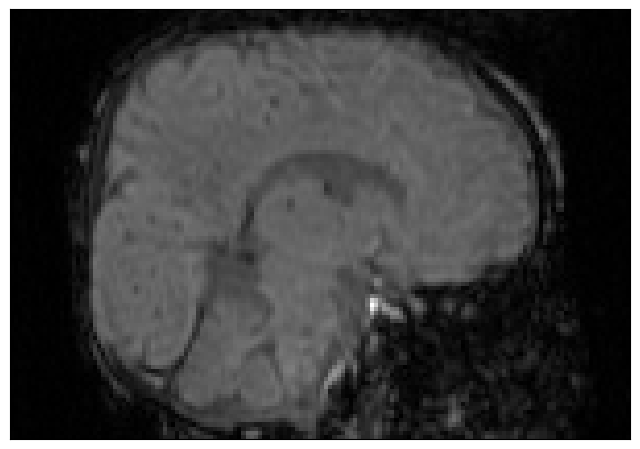

'/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Quarto_Chisep_CSVO2_Manuscript/images/magecho5.png'

In [13]:
nii_gz_relpath = 'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/mag_echo5.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

single_slice_cut = (62, slice(None), slice(None))
figsize=(8, 8)
cmap= 'gray'

magechofive_path="magecho5.png"
out_path=figpath + magechofive_path

plot_and_save_nifti_slice(nii_gz_path, slice_cut, single_slice_cut, figsize, out_path, cmap)

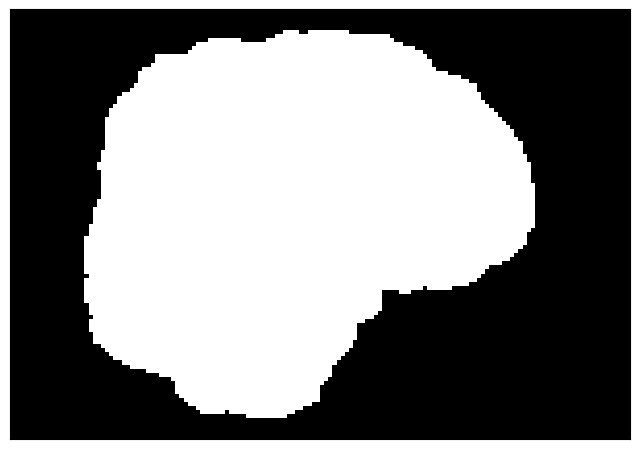

'/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Quarto_Chisep_CSVO2_Manuscript/images/InitialMask.png'

In [14]:
nii_gz_relpath = 'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/mag_echo5_sqr_brain_mask.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

initialmask_path="InitialMask.png"
out_path=figpath + initialmask_path

plot_and_save_nifti_slice(nii_gz_path, slice_cut, single_slice_cut, figsize, out_path, cmap)

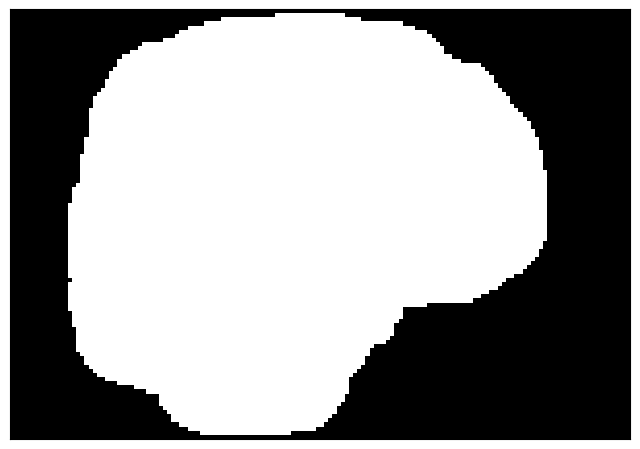

'/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Quarto_Chisep_CSVO2_Manuscript/images/DilatedMask.png'

In [15]:
nii_gz_relpath = 'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/dil7_echo5mask.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

dilatedmask_path="DilatedMask.png"
out_path=figpath + dilatedmask_path

plot_and_save_nifti_slice(nii_gz_path, slice_cut, single_slice_cut, figsize, out_path, cmap)

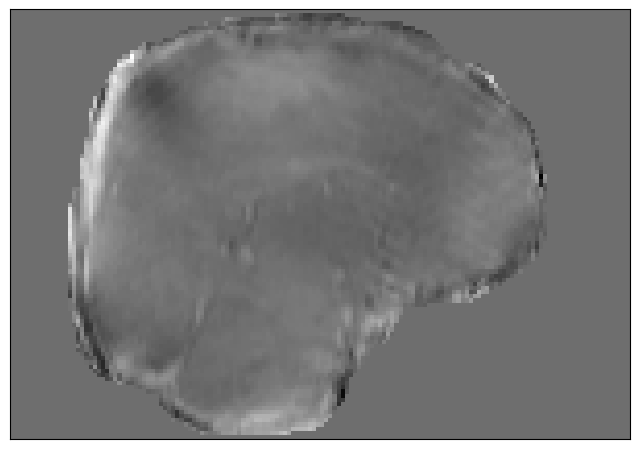

'/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Quarto_Chisep_CSVO2_Manuscript/images/ChiDilated.png'

In [16]:
fourD_slice_cut = [slice(60, 190), slice(50, 200), slice(None), 1]
nii_gz_relpath = 'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/chi_dil7_echo5.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

chidil_path="ChiDilated.png"
out_path=figpath + chidil_path

plot_and_save_nifti_slice(nii_gz_path, fourD_slice_cut, single_slice_cut, figsize, out_path, cmap)

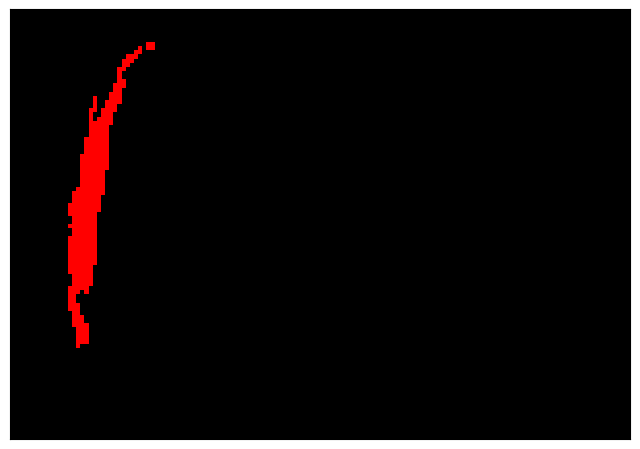

'/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Gavin_CSVO2/Quarto_Chisep_CSVO2_Manuscript/images/SSSMask.png'

In [17]:

colors = ['black', 'red']
custom_cmap = ListedColormap(colors)

nii_gz_relpath = 'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/sss_dil7_echo5_mask.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

sssmask_path="SSSMask.png"
out_path=figpath + sssmask_path

plot_and_save_nifti_slice(nii_gz_path, slice_cut, single_slice_cut, figsize, out_path, custom_cmap)

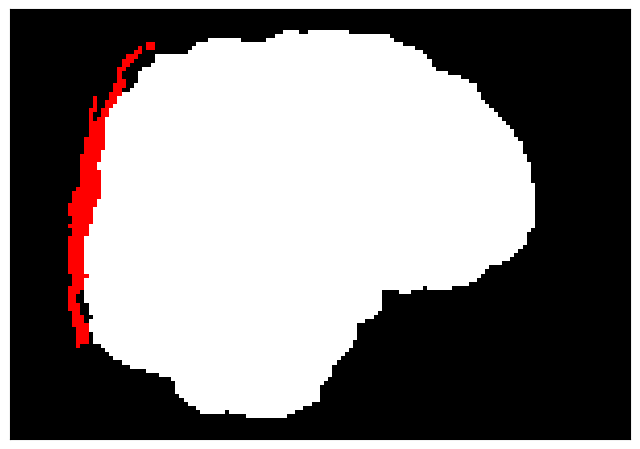

In [18]:
nii_gz_path=basepath+'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/sss_dil7_echo5_mask.nii.gz'

# Load the NIfTI image
nii_img = nib.load(nii_gz_path)
nii_data = nii_img.get_fdata()

# Extract a single slice
subregion_data = nii_data[slice_cut[0], slice_cut[1], slice_cut[2]]
single_slice_data = subregion_data[single_slice_cut]

# Create a new figure with the specified figsize
plt.figure(figsize=figsize)

colors = ['black', 'red']
custom_cmap = ListedColormap(colors)

# Display the single slice with the specified colormap
plt.imshow(single_slice_data.T, cmap=custom_cmap, origin='lower')

nii_gz_path=basepath+'QSM_SSS/calc_chi/sub-AMWCER18/STISuite_Last3Echos/mag_echo5_sqr_brain_mask.nii.gz'

# Load the NIfTI image
nii_img = nib.load(nii_gz_path)
nii_data = nii_img.get_fdata()

subregion_data = nii_data[slice_cut[0], slice_cut[1], slice_cut[2]]

# Extract a single slice
single_slice_data2 = subregion_data[single_slice_cut]
mycmap = plt.cm.gray
mycmap.set_bad(alpha=0)
plt.imshow(single_slice_data2.T, cmap='gray', alpha=single_slice_data2.T, origin='lower', interpolation='none')

# Remove x-axis and y-axis ticks
plt.xticks([])
plt.yticks([])

finalmask_name="finalmask.png"
finalmask_path=figpath+finalmask_name
# Save the plot as a PNG file
plt.savefig(finalmask_path, dpi=300, bbox_inches="tight", pad_inches=0)

# Show the plot (optional)
plt.show()


In [19]:

def resize_image_to_png(original_path, resize_percent, output_png_name):
    """
    Resize an image file and save it as a PNG file.

    Parameters:
    - sssmask_path (str): Path to the input image file.
    - resize_percent (float): Percentage by which to resize the image (e.g., 30 for 30%).
    - output_png_name (str): Desired name for the output PNG file (without the file extension).

    Returns:
    - str: Path to the saved PNG file.
    """
    # Load the image using Pillow
    img = Image.open(original_path)

    # Get the original width and height
    original_width, original_height = img.size

    # Calculate the new dimensions based on the percentage
    new_width = int(original_width * (resize_percent / 100))
    new_height = int(original_height * (resize_percent / 100))

    # Resize the image
    resized_img = img.resize((new_width, new_height))

    # Set the output file path for the resized image
    output_png_path = f"{output_png_name}.png"

    # Save the resized image as a PNG file
    resized_img.save(output_png_path)

    # Return the path to the saved PNG file
    return output_png_path

In [23]:
# Create a new graph
graph = graphviz.Graph(engine='neato')

# Add nodes with text and images
#graph.node('A', 'NifTI image file', shape='box', pos='0,0!')

resized_mag5_path = resize_image_to_png(figpath + magechofive_path, 30, figpath + "initialmag5_resized")
node_a_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{resized_mag5_path}" /></TD></TR><TR><TD ALIGN="CENTER">SWI magnitude, 5th echo</TD></TR></TABLE>>'
graph.node('A', label=node_a_label, shape='none', pos='0,0!')

graph.node('B', 'Create initial \nbrain mask', shape='ellipse', pos='2.5,0!')
graph.node('1', f'<<b>1</b>>', shape='none', pos='1.5,.3!')

resized_mask_path = resize_image_to_png(figpath + initialmask_path, 30, figpath + "initialmask_resized")
node_c_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{resized_mask_path}" /></TD></TR><TR><TD ALIGN="CENTER">Brain mask</TD></TR></TABLE>>'
graph.node('C', label=node_c_label, shape='none', pos='5,0!')

graph.node('D', 'Dilate', shape='ellipse', pos='6.7,0!')
graph.node('2', f'<<b>2</b>>', shape='none', pos='6.3,.3!')

dilmaskresized_image_path = resize_image_to_png(figpath + dilatedmask_path, 30, figpath + "dilmask_resized")
node_e_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{dilmaskresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">Dilated brain mask</TD></TR></TABLE>>'
graph.node('E', label=node_e_label, shape='none', pos='8.5,0!')

graph.node('F', 'Calculate QSM with \ndilated mask', shape='ellipse', pos='8.5,-1.7!')
graph.node('3', f'<<b>3</b>>', shape='none', pos='7.3,-1.3!')

dilchiresized_image_path = resize_image_to_png(figpath + chidil_path, 30, figpath + 'dilchi_resized')
node_e_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{dilchiresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">Dilated QSM image</TD></TR></TABLE>>'
graph.node('G', label=node_e_label, shape='none', pos='8.5,-3.4!')

graph.node('H', 'SSS segmentation',  shape='ellipse', pos='8.5,-5!')
graph.node('4', f'<<b>4</b>>', shape='none', pos='7.3,-4.75!')

sssmaskresized_image_path = resize_image_to_png(figpath + sssmask_path, 30, figpath + 'sssmask_resized')
node_i_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{sssmaskresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">SSS mask</TD></TR></TABLE>>'
graph.node('I', label=node_i_label, shape='none', pos='5,-5!')

graph.node('J', 'Combine masks',  shape='ellipse', pos='5,-2.5!')
graph.node('5', f'<<b>5</b>>', shape='none', pos='4.2,-2.2!')

finalmaskresized_image_path = resize_image_to_png(figpath + finalmask_name, 30, figpath + 'finalmask_resized')
node_k_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{finalmaskresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">Final mask with SSS</TD></TR></TABLE>>'
graph.node('K', label=node_k_label, shape='none', pos='2,-2.5!')

# Add edges between nodes
graph.edge('A', 'B', label='', constraint='false')
graph.edge('B', 'C', dir='forward', label='', constraint='false')
graph.edge('C', 'D', label='', constraint='false')
graph.edge('D', 'E', dir='forward', label='', constraint='false')
graph.edge('E', 'F',  label='', constraint='false')
graph.edge('F', 'G', dir='forward', label='', constraint='false')
graph.edge('G', 'H',  label='', constraint='false')
graph.edge('C', 'J',  label='', constraint='false')
graph.edge('I', 'J',  label='', constraint='false')
graph.edge('H', 'I', dir='forward', label='', constraint='false')
graph.edge('J', 'K', dir='forward', label='', constraint='false')

# Attributes
graph.attr(dpi='300', bgcolor='white', forcelabels='true')

# Render the graph
graph.render(figpath + 'example_graph', format='png', engine='neato', cleanup=True)

from IPython.display import Image as Ipmage
from IPython.display import display
from io import BytesIO

# Render the graph to a BytesIO object
png_bytes = graph.pipe(format='png')

# Display the graph using IPython.display
display(Ipmage(png_bytes))